# Deliverable 3: Optimization 75% accuracy or higher

In [1]:
# Import our dependencies. Brought over from ipynb file Delverable 1 and 2. Created a new file as the application_df was already preprocessed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("fileresources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN"],1)

In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_type = application_df.APPLICATION_TYPE.value_counts()
application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at NAME value counts for binning
name_counts = application_df.NAME.value_counts()
#  How many name counts are greater than 10?
name_counts[name_counts>10]

PARENT BOOSTER USA INC                                                    1260
TOPS CLUB INC                                                              765
UNITED STATES BOWLING CONGRESS INC                                         700
WASHINGTON STATE UNIVERSITY                                                492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                            408
                                                                          ... 
NATIONAL COUNCIL FOR GEOCOSMIC RESEARCH INC                                 11
USA SWIMMING INC                                                            11
SOCIETY FOR PRESERVATION & ENCOURMT OF BARBERSHOP QUARTET SINGING AMER      11
FELLOWSHIP OF CHRISTIAN COWBOYS INC                                         11
PEARLAND LADY OILER GOLF BOOSTER CLUB                                       11
Name: NAME, Length: 204, dtype: int64

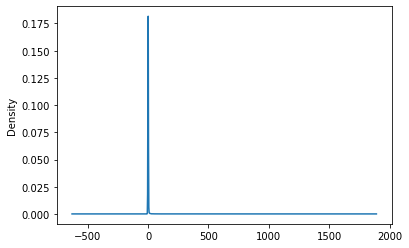

In [9]:
# Visualize the density name counts
name_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than or equal to 10.
replace_application = list(name_counts[name_counts <= 10].index)

# Replace in dataframe
for app in replace_application:
    application_df.NAME = application_df.NAME.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                          21202
PARENT BOOSTER USA INC                          1260
TOPS CLUB INC                                    765
UNITED STATES BOWLING CONGRESS INC               700
WASHINGTON STATE UNIVERSITY                      492
                                               ...  
USA SWIMMING INC                                  11
SIGMA ALPHA OMEGA CHRISTIAN SORORITY INC          11
NATIONAL COUNCIL FOR GEOCOSMIC RESEARCH INC       11
SONS OF ITALY IN AMERICA                          11
FELLOWSHIP OF CHRISTIAN COWBOYS INC               11
Name: NAME, Length: 205, dtype: int64

In [12]:
# Determine which values to replace if counts are less than 1000
replace_application = list(application_type[application_type < 1000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [13]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C8210        1
C1370        1
C2570        1
C4200        1
C1248        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [15]:
# Determine which values to replace if counts are less than 1000
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [16]:
# Generate our categorical variable lists
application_category = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [17]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_category]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_category)
encode_df.head()

,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ART THERAPY ASSOCIATION INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_category,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
# Splitting processed data
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Splitting to Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
#Deep Neural Network model setup
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  200
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               49200     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 60,291
Trainable params: 60,291
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [23]:
# Define the checkpoint path and filenames
os.makedirs("challenge_checkpoints/",exist_ok=True)
checkpoint_path = "challenge_checkpoints/weights.{epoch:02d}.hdf5"

In [24]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
#callback model to weight each epoch iteration
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq='epoch')

In [26]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4856 - accuracy: 0.7715

Epoch 00001: saving model to challenge_checkpoints\weights.01.hdf5
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4528 - accuracy: 0.7818

Epoch 00002: saving model to challenge_checkpoints\weights.02.hdf5
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4472 - accuracy: 0.7846

Epoch 00003: saving model to challenge_checkpoints\weights.03.hdf5
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4437 - accuracy: 0.7856

Epoch 00004: saving model to challenge_checkpoints\weights.04.hdf5
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4415 - accuracy: 0.7879

Epoch 00005: saving model to challenge_checkpoints\weights.05.hdf5
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4402 - accuracy: 0.7865

Epoch 00006: saving model to challenge_checkpoints\we

804/804 [==============================] - 1s 1ms/step - loss: 0.4210 - accuracy: 0.7974

Epoch 00049: saving model to challenge_checkpoints\weights.49.hdf5
Epoch 50/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4206 - accuracy: 0.7969

Epoch 00050: saving model to challenge_checkpoints\weights.50.hdf5
Epoch 51/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4217 - accuracy: 0.7972: 

Epoch 00051: saving model to challenge_checkpoints\weights.51.hdf5
Epoch 52/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4205 - accuracy: 0.7967

Epoch 00052: saving model to challenge_checkpoints\weights.52.hdf5
Epoch 53/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4205 - accuracy: 0.7971

Epoch 00053: saving model to challenge_checkpoints\weights.53.hdf5
Epoch 54/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4204 - accuracy: 0.7977

Epoch 00054: saving model to challenge_checkpoints\weights

Epoch 97/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4175 - accuracy: 0.7993

Epoch 00097: saving model to challenge_checkpoints\weights.97.hdf5
Epoch 98/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4175 - accuracy: 0.7993

Epoch 00098: saving model to challenge_checkpoints\weights.98.hdf5
Epoch 99/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4183 - accuracy: 0.7983

Epoch 00099: saving model to challenge_checkpoints\weights.99.hdf5
Epoch 100/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4183 - accuracy: 0.7986

Epoch 00100: saving model to challenge_checkpoints\weights.100.hdf5


In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4589 - accuracy: 0.7806
Loss: 0.4588967561721802, Accuracy: 0.7806413769721985


In [28]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization_Deliverable 3.h5")